In [ ]:
!pip install nltk beautifulsoup4


[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import os
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
import re
from nltk.stem import WordNetLemmatizer

# Ensure necessary NLTK data packages are downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def load_corpus_from_files(*csv_files):
    corpus = []
    for csv_file in csv_files:
        with open(csv_file, 'r', encoding='utf-8') as file:
            text = file.read()
            corpus.append(text)
    return corpus

corpus = load_corpus_from_files('AVELLANEDA__Quijote.csv',
                                 'CARVAJAL__Quien-bien-obra.csv',
                                 'CARVAJAL__Venus-de-Ferrara.csv',
                                 'CASTILLO__Bachiller-Trapaza-1-6.csv',
                                 'CASTILLO__Dos-dichas-sin-pensar.csv',
                                 'CASTILLO__Estafa-1.csv',
                                 'CASTILLO__Estafa-2.csv',
                                 'CASTILLO__Estafa-3.csv',
                                 'CASTILLO__Estafa-4.csv')

In [ ]:
# 保存预处理前的文本到文件
from nltk.corpus.reader import PlaintextCorpusReader
with open('original_corpus.txt', 'w', encoding='utf-8') as f:
    for document in corpus:
        f.write(document + '\n')
# 使用 NLTK 加载语料库
corpus_original = './'
wordlists = PlaintextCorpusReader(corpus_original, 'original_corpus.txt')

In [ ]:
# 导入预处理工具
stop_words = set(stopwords.words('spanish'))
lemmatizer = WordNetLemmatizer()

with open('original_corpus.txt', 'w', encoding='utf-8') as f:
    for document in corpus:
        f.write(document + '\n')

# 定义预处理函数
def preprocess(corpus_document):
    # 转换为小写
    corpus_document = corpus_document.lower()
    # 去除标点符号
    corpus_document = re.sub(r'[^\w\s]', '', corpus_document)
    # 去除多余的空格
    corpus_document = re.sub(r'\s+', ' ', corpus_document).strip()
    # 分词
    tokens = word_tokenize(corpus_document)
    # 去除停用词
    tokens = [word for word in tokens if word not in stop_words]

    return tokens
    

preprocessed_cnso = [preprocess(doc) for doc in corpus]

# Use PlaintextCorpusReader to load the corpus
with open('preprocessed_cnso.txt', 'w', encoding='utf-8') as f:
    for document in preprocessed_cnso:
        f.write(' '.join(document) + '\n')

# Providing the correct path to the file
preprocessed_cnso_path = '/work/preprocessed_cnso.txt'
wordlists = PlaintextCorpusReader(preprocessed_cnso_path, 'preprocessed_cnso.txt')

In [ ]:
from collections import Counter

# 统计词频
word_freq = Counter()
for doc in preprocessed_cnso:
    word_freq.update(doc)

# 打印词频最高的前 30 个词
print("Top 30 most common words:")
print(word_freq.most_common(30))


Top 30 most common words:
[('don', 1414), ('dijo', 928), ('si', 903), ('sancho', 797), ('quijote', 779), ('pues', 737), ('tan', 690), ('merced', 580), ('señor', 561), ('bien', 558), ('vuesa', 508), ('así', 480), ('casa', 466), ('dos', 451), ('ser', 407), ('hacer', 378), ('caballero', 365), ('aquí', 289), ('luego', 283), ('hecho', 270), ('dios', 261), ('diciendo', 255), ('allí', 254), ('cómo', 244), ('ver', 237), ('día', 236), ('respondió', 233), ('aquel', 229), ('dama', 229), ('noche', 225)]


In [ ]:
from nltk import ngrams

# 定义 N-gram 提取函数
def extract_ngrams(tokens, n):
    n_grams = ngrams(tokens, n)
    return [' '.join(grams) for grams in n_grams]

# 提取 bi-grams
bi_grams = []
for doc in preprocessed_cnso:
    bi_grams.extend(extract_ngrams(doc, 2))

# 统计 bi-gram 频率
bi_gram_freq = Counter(bi_grams)

# 打印最常见的前 30 个 bi-grams
print("Top 30 most common bi-grams:")
print(bi_gram_freq.most_common(30))


Top 30 most common bi-grams:
[('don quijote', 779), ('vuesa merced', 482), ('don álvaro', 204), ('señor don', 140), ('dijo don', 138), ('don carlos', 99), ('dijo sancho', 98), ('si bien', 82), ('sancho panza', 75), ('don gregorio', 73), ('don gastón', 70), ('respondió sancho', 58), ('reina zenobia', 57), ('vuesas mercedes', 54), ('v m', 54), ('caballero desamorado', 50), ('doña luisa', 50), ('señor caballero', 49), ('sancho dijo', 48), ('señora reina', 44), ('merced señor', 43), ('tan grande', 39), ('aquella noche', 38), ('quijote mancha', 36), ('caballero andante', 36), ('cada día', 36), ('tan bien', 35), ('álvaro tarfe', 34), ('replicó sancho', 33), ('don tadeo', 33)]


In [ ]:
!pip install wordcloud
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus.reader import PlaintextCorpusReader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.6/513.6 kB 42.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


[('don', 1414), ('dijo', 928), ('si', 903), ('sancho', 797), ('quijote', 779), ('pues', 737), ('tan', 690), ('merced', 580), ('señor', 561), ('bien', 558), ('vuesa', 508), ('así', 480), ('casa', 466), ('dos', 451), ('ser', 407), ('hacer', 378), ('caballero', 365), ('aquí', 289), ('luego', 283), ('hecho', 270), ('dios', 261), ('diciendo', 255), ('allí', 254), ('cómo', 244), ('ver', 237), ('día', 236), ('respondió', 233), ('aquel', 229), ('dama', 229), ('noche', 225)]


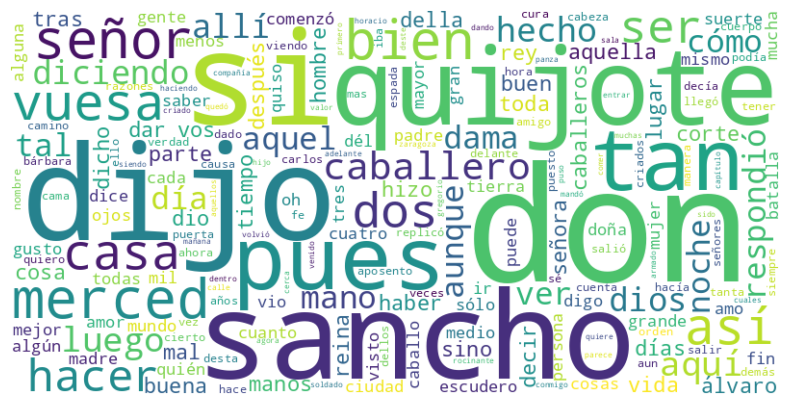

In [ ]:
from nltk.corpus.reader import PlaintextCorpusReader
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fixing the path assignment and instantiating the PlaintextCorpusReader correctly
preprocessed_cnso_path = '/work/'
wordlists = PlaintextCorpusReader(preprocessed_cnso_path, 'preprocessed_cnso.txt')

# 计算词频
word_freq = Counter(wordlists.words('preprocessed_cnso.txt'))
print(word_freq.most_common(30))  # 输出出现频率最高的30个词

# 生成词云
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# 显示词云
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Install spacy using ! to indicate it's a shell command
!pip install spacy

# Download the Spanish model for spacy
!python -m spacy download es_core_news_sm


[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
2024-06-27 21:02:47.597669: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-27 21:02:47.717688: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-06-27 21:02:47.717727: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-06-27 21:02:47.738680: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin

In [ ]:
import spacy
from nltk.corpus.reader import PlaintextCorpusReader

# 加载西班牙语语言模型
nlp = spacy.load('es_core_news_sm')

# 读取文本
with open('preprocessed_cnso.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# 处理文本
doc = nlp(text)

# 输出词根化结果
lemmatized_text = " ".join([token.lemma_ for token in doc])

# Write the lemmatized text data directly to file
with open('lemmatized_text.txt', 'w', encoding='utf-8') as f:
    f.write(lemmatized_text)

# 使用 NLTK 加载语料库
lemmatized_text_dir = './'
wordlists = PlaintextCorpusReader(lemmatized_text_dir, 'lemmatized_text.txt')

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-06-27 21:02:53.496520: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-27 21:02:53.613599: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-06-27 21:02:53.613625: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-06-27 

[('él', 2149), ('decir', 1981), ('don', 1414), ('hacer', 1298), ('dar', 1033), ('si', 903), ('ver', 872), ('tanto', 871), ('sancho', 794), ('quijote', 779), ('pues', 729), ('poder', 666), ('señor', 650), ('ser', 600), ('merced', 585), ('bien', 568), ('aquel', 568), ('caballero', 519), ('querer', 501), ('casa', 486), ('así', 480), ('ir', 467), ('saber', 463), ('dos', 451), ('día', 438), ('buen', 423), ('vuesar', 406), ('mano', 371), ('salir', 366), ('llegar', 356)]


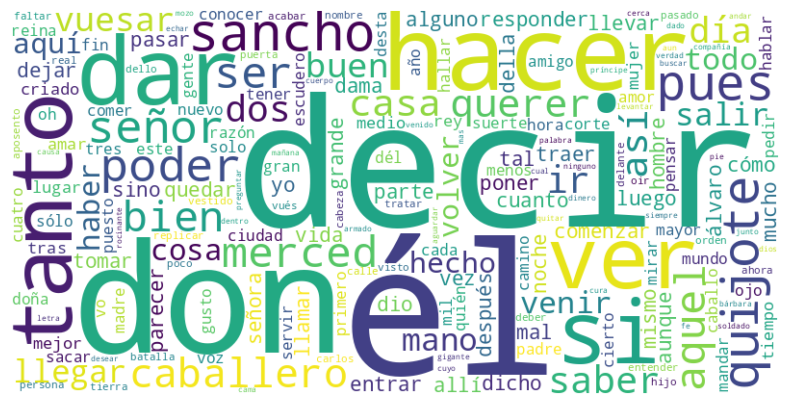

In [ ]:
lemmatized_text_path = '/work/'
wordlists = PlaintextCorpusReader(lemmatized_text_path, 'lemmatized_text.txt')

word_freq = Counter(wordlists.words('lemmatized_text.txt'))
print(word_freq.most_common(30))  # 输出出现频率最高的30个词

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
import nltk

# Download the 'averaged_perceptron_tagger' resource
nltk.download('averaged_perceptron_tagger')

with open('lemmatized_text.txt', 'r', encoding='utf-8') as f:
    text = f.read()
# 处理文本
doc = nlp(text)

# 输出词汇和对应的词性标注
for token in doc:
    print(token.text, "-->", token.pos_, "(" + spacy.explain(token.pos_) + ")")

words = wordlists.words()
pos_tags = nltk.pos_tag(words)
print(pos_tags[:10])

 NOUN (noun)
oro --> NOUN (noun)
haber --> AUX (auxiliary)
dar --> VERB (verb)
barato --> ADJ (adjective)
posado --> ADJ (adjective)
dejar --> VERB (verb)
tahúr --> ADV (adverb)
abrasado --> ADJ (adjective)
dar --> VERB (verb)
diablo --> NOUN (noun)
abierto --> ADJ (adjective)
puerta --> ADP (adposition)
faltar --> PROPN (proper noun)
gente --> NOUN (noun)
viesar --> VERB (verb)
juego --> NOUN (noun)
conocer --> VERB (verb)
disfrazado --> ADJ (adjective)
estudiante --> NOUN (noun)
manifestar --> VERB (verb)
este --> DET (determiner)
indiciado --> NOUN (noun)
cierto --> DET (determiner)
travesura --> NOUN (noun)
salamanca --> ADJ (adjective)
así --> ADV (adverb)
andar --> VERB (verb)
huir --> VERB (verb)
justicia --> NOUN (noun)
seguir --> VERB (verb)
ganancioso --> ADJ (adjective)
saber --> AUX (auxiliary)
posado --> VERB (verb)
reconocióla --> VERB (verb)
informar --> VERB (verb)
él --> PRON (pronoun)
quién --> PRON (pronoun)
hacer --> VERB (verb)
después --> ADV (adverb)
saber --> AU

In [ ]:
from collections import Counter

with open('lemmatized_text.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# 处理文本
doc = nlp(text)

# 提取词汇（去除标点符号和停用词）
words = [token.lemma_ for token in doc if not token.is_punct and not token.is_stop]

# 统计词汇频率
word_freq = Counter(words)

# 输出词汇及其频率
for word, freq in word_freq.most_common():
    print(f"{word}: {freq}")


tienda: 1
mostrárselir: 1
tráigamela: 1
desconsuelo: 1
desmandé: 1
valgo: 1
expresión: 1
recatar: 1
calificadísimo: 1
tratándosele: 1
conventos: 1
andáis: 1
supiésed: 1
encontrara: 1
infiero: 1
supiérad: 1
pagare: 1
dejái: 1
inspirar: 1
tiénela: 1
casadir: 1
préciome: 1
orozco: 1
mo: 1
teodorar: 1
sondo: 1
catálogo: 1
conducto: 1
catarral: 1
conservéis: 1
pespuntar: 1
ribet: 1
descosió: 1
purpúreos: 1
alcaid: 1
orificio: 1
locuaz: 1
agrio: 1
pedigüeñar: 1
portapaz: 1
infestar: 1
adüán: 1
clavel: 1
monacal: 1
ósculo: 1
socaliña: 1
azar: 1
antojadizar: 1
devorante: 1
caterva: 1
mascar: 1
gastáis: 1
embrión: 1
animad: 1
repar: 1
circular: 1
diaquilón: 1
tribu: 1
mesurado: 1
baquiano: 1
entendierar: 1
melancólicos: 1
suplícoos: 1
obligara: 1
cás: 1
divirtiésed: 1
dejo él: 1
piérdese: 1
recibióle: 1
alegremente: 1
supliquéle: 1
quedar él: 1
desacierto: 1
excedí: 1
avisáradesme: 1
procurara: 1
respondíalir: 1
cláusula: 1
monacillo: 1
fúnebre: 1
paseábase: 1
confinar: 1
dividir: 1
negárselo: 

In [ ]:
words = [token.lemma_ for token in doc if not token.is_punct and not token.is_stop]

# 统计词汇频率
word_freq = Counter(words)

# 输出词汇及其频率
for word, freq in word_freq.most_common(20):  # 输出前20个最常见的词汇
    print(f"{word}: {freq}")

don: 1414
sancho: 791
quijote: 778
señor: 652
merced: 588
caballero: 515
querer: 512
casa: 480
vuesar: 432
mano: 384
salir: 380
venir: 366
llegar: 363
volver: 297
cosa: 295
responder: 294
dejar: 268
quedar: 258
noche: 242
pasar: 239


/tmp/ipykernel_79/1306492722.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freqs, y=words, palette='viridis')


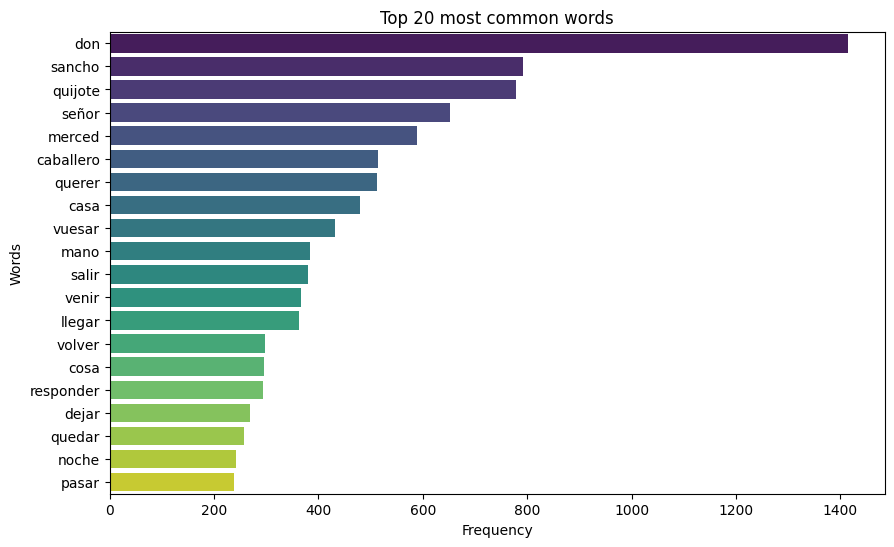

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 获取前20个最常见的词汇
common_words = word_freq.most_common(20)

# 准备数据
words, freqs = zip(*common_words)

# 创建条形图
plt.figure(figsize=(10, 6))
sns.barplot(x=freqs, y=words, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 most common words')
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=16135763-7a91-4070-a884-d1f808b874f1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>